### Problem 5.4 ###

The differential equation $\frac{df(t)}{dt}= e^{-t}$ with initial condition $f_0=-1$ has the exact solution $f(t)=-e^{-t}$ . Approximate the solution to this initial value problem between zero and 1 in increments of 0.1 using the explicit Euler formula. Plot the difference between the approximated solution and the exact solution.

The explicit Euler can be write as 
$$S(t_{j+1} )=S(t_j )+hF(t_j,S(t_j ))$$

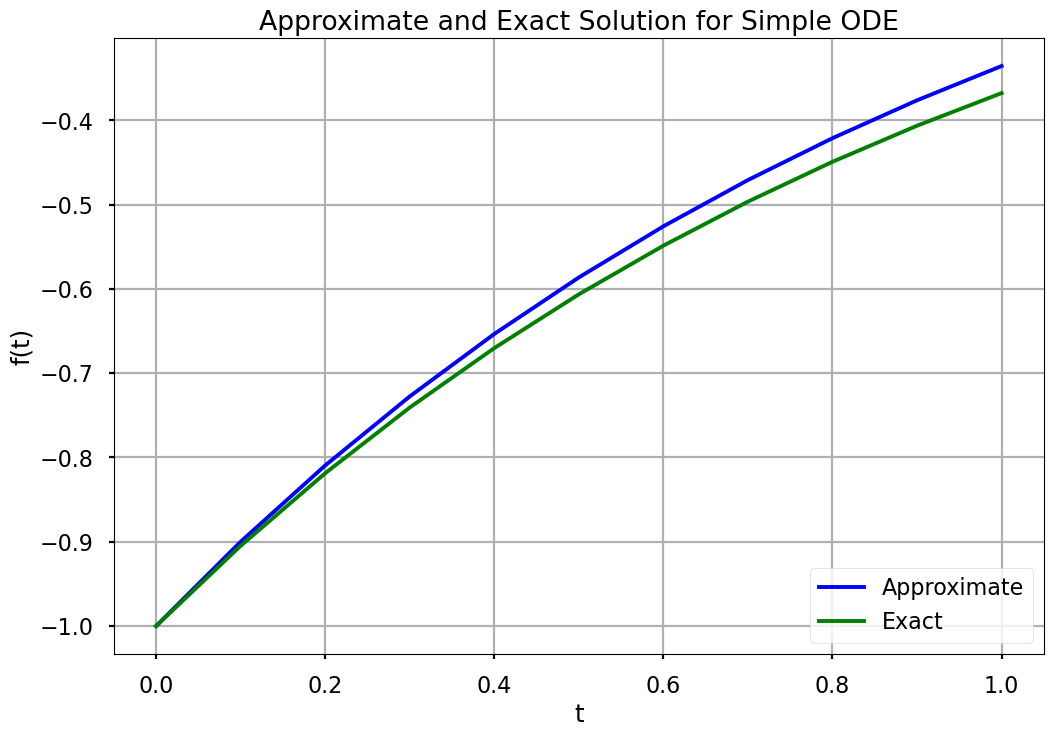

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
	 s[i + 1] = s[i] + h*f(t[i], s[i])
plt.figure(figsize = (12, 8))
plt.plot(t, s, "b-", label="Approximate")
plt.plot(t, -np.exp(-t), "g", label="Exact")
plt.title("Approximate and Exact Solution for Simple ODE")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc="lower right")
plt.show()


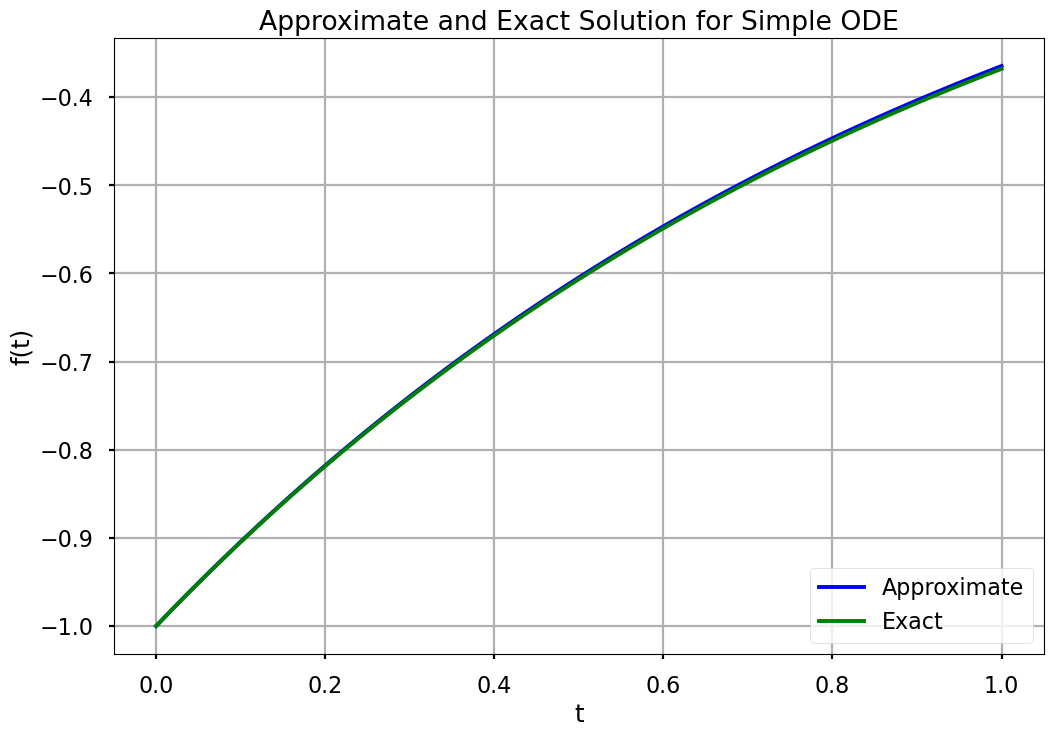

In [4]:
h = 0.01 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
	 s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, "b-", label="Approximate")
plt.plot(t, -np.exp(-t), "g", label="Exact")
plt.title("Approximate and Exact Solution for Simple ODE")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc="lower right")
plt.show()


Problem 5.5 Use the explicit and implicit Euler, as well as trapezoidal, formulas to solve the pendulum equation over the time interval [ 0,5 ] in increments of 0.1, and for an initial solution of $ S_0=[1,0]^T$. For the model parameters using$\sqrt{\frac{g}{l}}=4$, plot the approximate solution on a single graph.

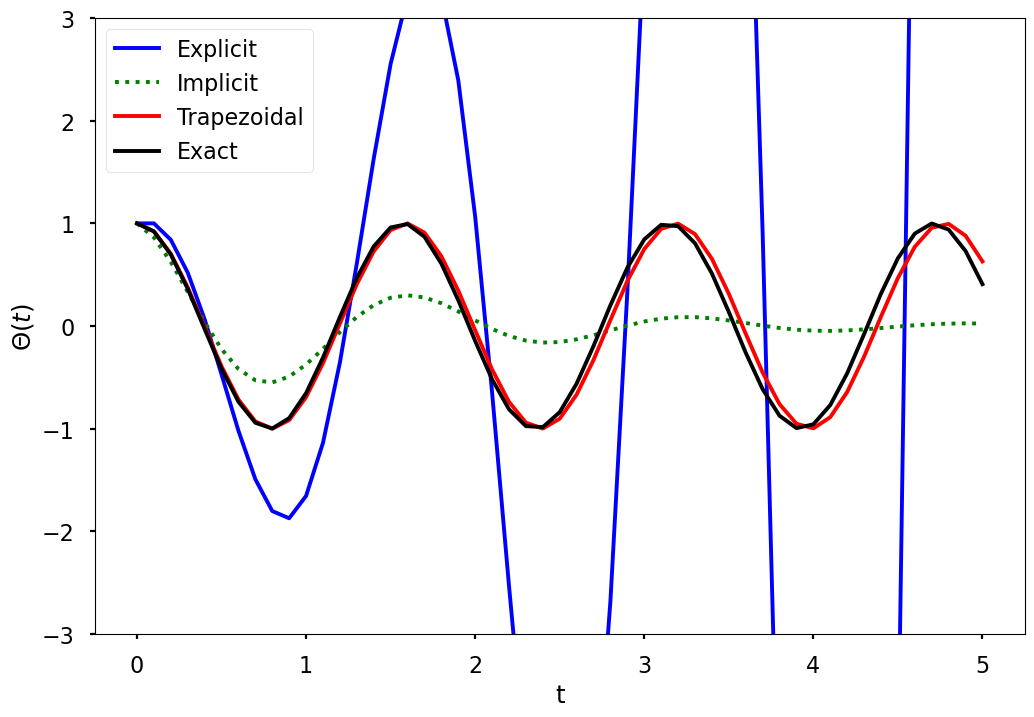

In [44]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
                   [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
	s_e[j+1, :] = np.dot(m_e,s_e[j, :])
	s_i[j+1, :] = np.dot(m_i,s_i[j, :])
	s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],"b-")
plt.plot(t,s_i[:,0],"g:")
plt.plot(t,s_t[:,0],"r-")
plt.plot(t, np.cos(w*t), "k")
plt.ylim([-3, 3])
plt.xlabel("t")
plt.ylabel("$\Theta (t)$")
plt.legend(["Explicit", "Implicit", "Trapezoidal", 
	         "Exact"])
plt.show()


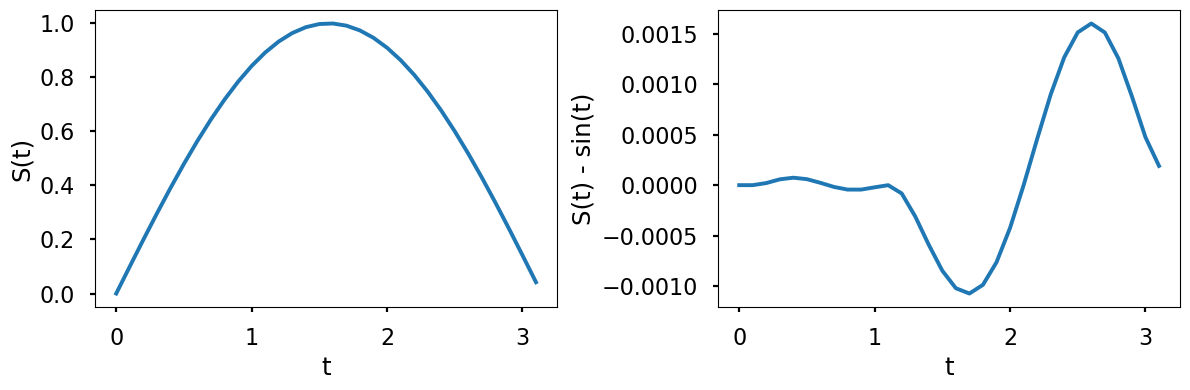

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()
plt.show()

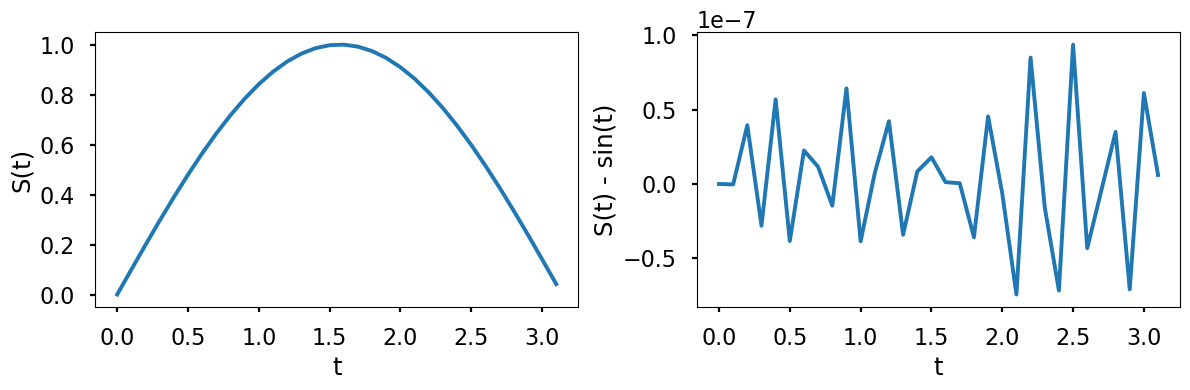

In [48]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()
plt.show()


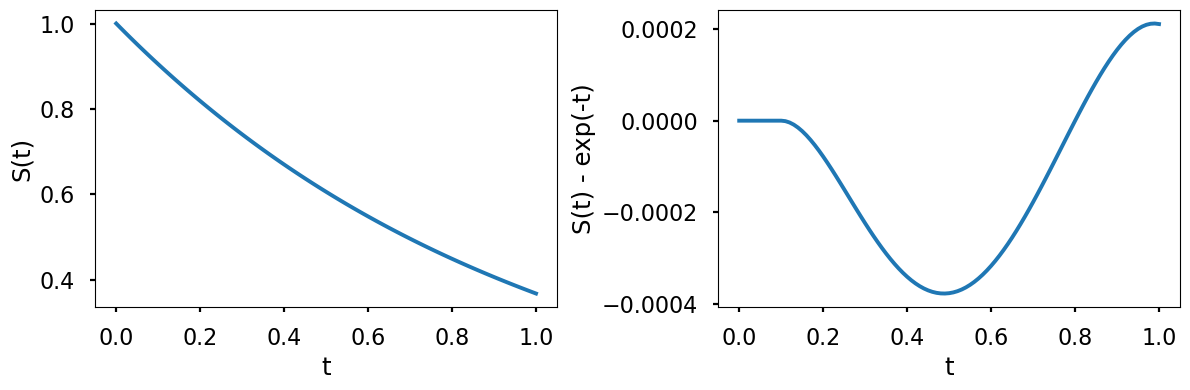

In [50]:
F = lambda t, s: -s
t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - exp(-t)")
plt.tight_layout()
plt.show()



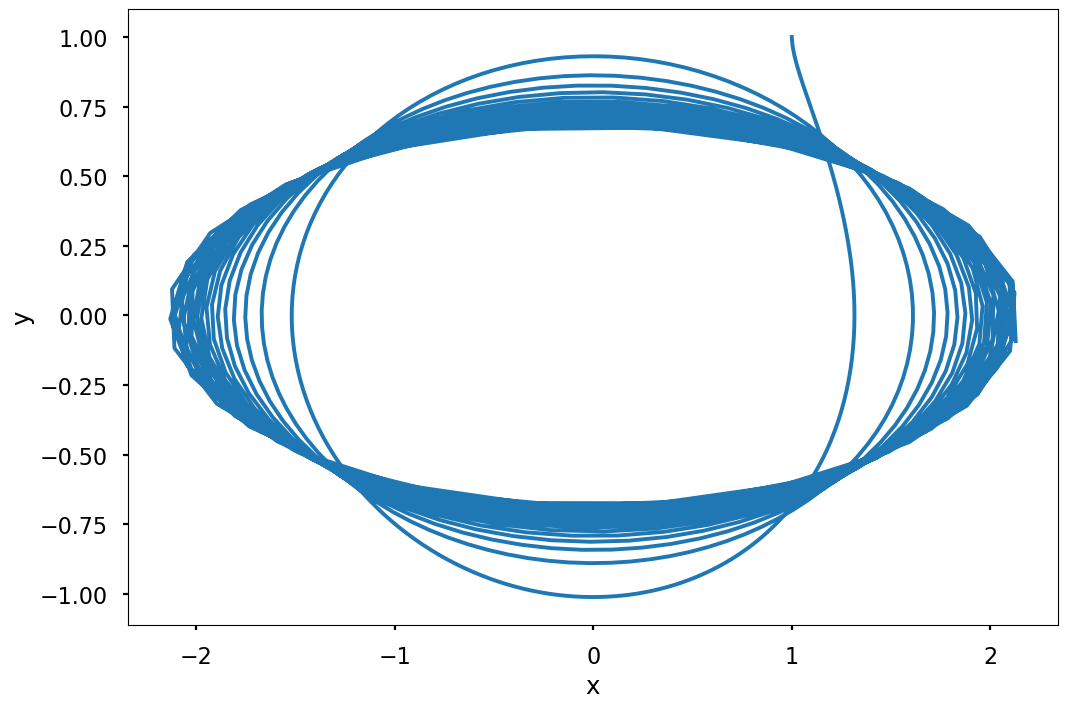

In [51]:
F=lambda t, s: np.dot(np.array([[0, t**2], [-t,0]]),s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()
